##### - 빅데이터 분석과 활용 - 
- Regression 실습
- 화 1~2
- 부동산 예측하기 with Regression : 미국 매사추세츠주의 주택 가격 데이터(Boston Housing 1970)를 활용해 지역의 평균 주택 가격을 예측하는 선형 회귀 모델을 만들었고, 이를 기초하여 주택 가격의 영향 요소 파악 및 주택 가격 예측을 진행하였습니다.

    0. 개요
    1. Library & Data Import
    2. 데이터 파악 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악
        2-2. 종속 변수(목표 변수) 탐색
        2-3. 설명 변수 탐색
        2-4. 설명변수와 종속변수 간의 관계 탐색
    3. 주택 가격 예측 모델링: 회귀 분석
        3-1. 데이터 전처리
        3-2. 회귀 모델링
        3-3. 모델 해석
        3-4. 모델 예측 결과 및 성능 평가

In [437]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1.  사용할 데이터 셋 가져오기 : Boston Housing Dataset

- 분석에 사용될 데이터셋은 Boston Housing 1970데이터의 일부 변수를 추출한 데이터입니다.
- 미국 매사추세츠주 92개 도시(TOWN)의 506개 지역의 주택 가격 및 기타 지역 특성 데이터가 포함되어 있습니다. (Dataset Introduction)

In [438]:
df=pd.read_csv("/content/onion.CSV", encoding = 'cp949')

In [439]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 한 번 살펴볼게요.
df.head(3)

,거래일자,양파(일반) 1.0 kg 그물망 /특,양파(일반) 1.0 kg 그물망 /상,양파(일반) 1.0 kg 그물망 /중,양파(일반) 1.0 kg 그물망 /하,양파(전체) 반입량,만생양파 1.0 kg 그물망 /특,만생양파 1.0 kg 그물망 /상,만생양파 1.0 kg 그물망 /중,만생양파 반입량,저장양파 1.0 kg 그물망 /특,저장양파 1.0 kg 그물망 /중,저장양파 반입량,조생양파 1.0 kg 그물망 /특,조생양파 1.0 kg 그물망 /상,조생양파 1.0 kg 그물망 /중,조생양파 1.0 kg 그물망 /하,조생양파 반입량,기타 1.0 kg 그물망 /특,기타 1.0 kg 그물망 /상,기타 1.0 kg 그물망 /중,기타 1.0 kg 그물망 /하,기타 반입량
0,2015-01-01,NaN,NaN,NaN,NaN,13916582.0,619.0,NaN,NaN,3786154.0,NaN,NaN,4935804.0,NaN,NaN,NaN,NaN,401340.0,600.0,NaN,NaN,NaN,10696722.0
1,2015-02-01,900.0,NaN,NaN,NaN,11005449.0,746.0,NaN,NaN,3175228.0,646.0,NaN,5064789.0,NaN,NaN,NaN,NaN,NaN,660.0,NaN,NaN,NaN,9499536.0
2,2015-03-01,1031.0,NaN,NaN,NaN,13611617.0,NaN,NaN,NaN,3660763.0,2042.0,NaN,5389042.0,NaN,NaN,NaN,NaN,2324.0,842.0,NaN,NaN,NaN,12055334.0


### 데이터 살펴보기 :Features Descriptions

각 변수 설명 :

    p = price
    s = supply
    d = demand

    1. date : 거래일자
    2. p_onion1 : 양파(일반) 1.0kg 그물망 / 특 등급 <가격>
    3. 양파(일반) 1.0kg 그물망 / 상 등급 <가격>
    4. 양파(일반) 1.0kg 그물망 / 중 등급 <가격>
    5. 양파(일반) 1.0kg 그물망 / 하 등급 <가격>
    6. s_onion1 : 양파(전체) 반입량 - 일반 <종류1>
    7. 만생양파 1.0kg 그물망 / 특 등급 <가격>
    8. 만생양파 1.0kg 그물망 / 상 등급 <가격>
    9. 만생양파 1.0kg 그물망 / 중 등급 <가격>
    10. 만생양파 반입량 <종류2>
    11. 저장양파 1.0 kg 그물망 /특 등급 <가격>
    12. 저장양파 1.0 kg 그물망 /중 등급 <가격>
    13. 저장양파 반입량 <종류3>
    14. 조생양파 1.0kg 그물망 / 특 등급 <가격>
    15. 조생양파 1.0kg 그물망 / 상 등급 <가격>
    16. 조생양파 1.0kg 그물망 / 중 등급 <가격>
    17. 조생양파 1.0kg 그물망 / 하 등급 <가격>
    18. 조생양파 반입량 <종류4>
    19. p_onion2 : 기타 1.0kg 그물망 / 특 등급 <가격>
    20. 기타 1.0kg 그물망 / 상 등급 <가격>
    21. 기타 1.0kg 그물망 / 중 등급 <가격>
    22. 기타 1.0kg 그물망 / 하 등급 <가격>
    23. s_onion2 : 기타 반입량 <종류5>



### 2. 데이터 탐색하기 (EDA: Exploratory Data Analysis)
데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성을 살펴보겠습니다.


In [440]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

#### 2-1. 데이터 셋의 기본 정보 파악하기

In [441]:
### 데이터 셋 구조 보기
df.shape 
### 해석: 행이 506, 집이 506개, 열이 17, 집값을 예측하는데 사용한 변수가 17개라고 생각하시면 됩니다. 

(73, 23)

In [442]:
### 결측치 : 비어있는 데이터를 찾습니다. 
### 여기서는 어떤 컬럼(변수, 특성, x)에 결측치가 많은지 봅니다.
df.isnull().sum()

거래일자                     0
양파(일반) 1.0 kg 그물망 /특     3
양파(일반) 1.0 kg 그물망 /상    33
양파(일반) 1.0 kg 그물망 /중    50
양파(일반) 1.0 kg 그물망 /하    72
양파(전체) 반입량               1
만생양파 1.0 kg 그물망 /특      65
만생양파 1.0 kg 그물망 /상      72
만생양파 1.0 kg 그물망 /중      73
만생양파 반입량                 1
저장양파 1.0 kg 그물망 /특      57
저장양파 1.0 kg 그물망 /중      72
저장양파 반입량                 1
조생양파 1.0 kg 그물망 /특      67
조생양파 1.0 kg 그물망 /상      71
조생양파 1.0 kg 그물망 /중      72
조생양파 1.0 kg 그물망 /하      72
조생양파 반입량                 8
기타 1.0 kg 그물망 /특         3
기타 1.0 kg 그물망 /상        59
기타 1.0 kg 그물망 /중        62
기타 1.0 kg 그물망 /하        72
기타 반입량                   1
dtype: int64

In [443]:
### 만약 결측치가 있다면, 결측치를 처리해야 됩니다. 이것을 전처리라고 합니다.
df = df.dropna(axis=1, thresh=30)


In [444]:
### data type을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   거래일자                  73 non-null     object 
 1   양파(일반) 1.0 kg 그물망 /특  70 non-null     float64
 2   양파(일반) 1.0 kg 그물망 /상  40 non-null     float64
 3   양파(전체) 반입량            72 non-null     float64
 4   만생양파 반입량              72 non-null     float64
 5   저장양파 반입량              72 non-null     float64
 6   조생양파 반입량              65 non-null     float64
 7   기타 1.0 kg 그물망 /특      70 non-null     float64
 8   기타 반입량                72 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.3+ KB


In [445]:
### 해석)거래일자만 object 변수(범주형 변수)이고, 이를 제외한 모든 변수는 숫자형입니다.

In [446]:
### 숫자형 변수만 뽑아서 기본 통계를 해 봅니다.

df.describe()

,양파(일반) 1.0 kg 그물망 /특,양파(일반) 1.0 kg 그물망 /상,양파(전체) 반입량,만생양파 반입량,저장양파 반입량,조생양파 반입량,기타 1.0 kg 그물망 /특,기타 반입량
count,70.000000,40.00000,7.200000e+01,7.200000e+01,7.200000e+01,6.500000e+01,70.000000,7.200000e+01
mean,1505.157143,1183.67500,1.209377e+07,3.843536e+06,4.681340e+06,5.775279e+06,1451.814286,1.762640e+07
std,518.762313,335.27963,4.838260e+06,2.426620e+06,2.313869e+06,1.093436e+07,652.640485,1.008827e+07
min,778.000000,700.00000,5.140211e+06,4.502600e+05,5.934180e+05,4.500000e+01,600.000000,6.130467e+06
25%,1131.750000,949.25000,8.033826e+06,2.137680e+06,3.115378e+06,1.369500e+05,1100.500000,1.141225e+07
50%,1400.000000,1129.50000,1.145211e+07,3.323170e+06,4.889256e+06,4.391470e+05,1317.500000,1.432342e+07
75%,1897.000000,1300.00000,1.438750e+07,4.932612e+06,6.234615e+06,3.104688e+06,1615.500000,2.104795e+07
max,3064.000000,2100.00000,2.635884e+07,1.099699e+07,1.058668e+07,4.295624e+07,4506.000000,6.081307e+07


In [447]:
### 범주형 변수(Categorical Variables): 문자열 변수
### 타운의 수, 소속도시의 수를 구합니다. 
### .unique()는 중복을 제거 하는 것입니다. 
### 2명이 노원구에 산다고, 노원구가 2개 되면 안되겠죠?:-) 노원구는 1개니까요. :-)

#num_town=df['TOWN'].unique()
#print(len(num_town))
#num_town

#거래일자 데이터 현재 형식 : 0000-00-00 => 숫자형 변수로 바꾸기 위해 우선 "-" 제거
df['거래일자'] = df['거래일자'].str.replace("-", "").head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [448]:
#거래일자 데이터 현재 형식 : 00000000 => dtype : float32로 변환
df['거래일자'] = df['거래일자'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [449]:
#거래일자 데이터 타입 바뀌었는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   거래일자                  5 non-null      float64
 1   양파(일반) 1.0 kg 그물망 /특  70 non-null     float64
 2   양파(일반) 1.0 kg 그물망 /상  40 non-null     float64
 3   양파(전체) 반입량            72 non-null     float64
 4   만생양파 반입량              72 non-null     float64
 5   저장양파 반입량              72 non-null     float64
 6   조생양파 반입량              65 non-null     float64
 7   기타 1.0 kg 그물망 /특      70 non-null     float64
 8   기타 반입량                72 non-null     float64
dtypes: float64(9)
memory usage: 5.3 KB


In [450]:
df = df[['거래일자', '양파(일반) 1.0 kg 그물망 /특', '양파(전체) 반입량', '기타 1.0 kg 그물망 /특', '기타 반입량']]

In [451]:
#column 이름 바꾸기 => 깔끔한 데이터 시각화를 위해
df.rename(columns = {'거래일자': 'date', '양파(일반) 1.0 kg 그물망 /특': 'p_onion1', '양파(전체) 반입량': 's_onion1', '기타 1.0 kg 그물망 /특': 'p_onion2', '기타 반입량': 's_onion2'}, inplace = True)
df.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,p_onion1,s_onion1,p_onion2,s_onion2
0,20150101.0,NaN,13916582.0,600.0,10696722.0
1,20150201.0,900.0,11005449.0,660.0,9499536.0
2,20150301.0,1031.0,13611617.0,842.0,12055334.0


In [452]:
#남은 null값들 평균으로 채워두기
df = df.fillna(df.mean())

#### 2-2 종속변수(타겟변수, y)의 탐색

    - CMEDV : 양파 거래 가격이 타겟변수가 됩니다. 왜냐면, 저희는 양파의 가격을 맞추기 위함이기 때문입니다. 
    - matplot 참고 사이트:
        - https://codetorial.net/matplotlib/basic_plot.html
        - https://matplotlib.org/stable/gallery/index.html

In [453]:
### 기초 통계량을 다시 살펴봅니다.

df['p_onion1'].describe()

count      73.000000
mean     1505.157143
std       507.839778
min       778.000000
25%      1200.000000
50%      1478.000000
75%      1888.000000
max      3064.000000
Name: p_onion1, dtype: float64

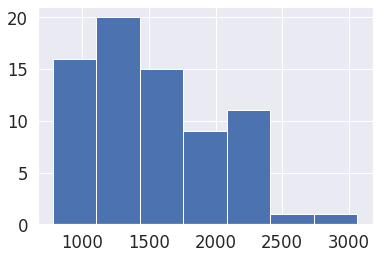

In [454]:
### 시각화를 해서 살펴봅니다. 데이터의 분포를 파악할때, 시각화가 가장 좋은 방법 중 한개 입니다.!! 
### .hist(): 히스토그램을 의미합니다. bins=50:주머니가 50개 이다. x가 50개로 나누어 진다라고 이해하셔도 좋습니다. 
### y축은 frequency 빈도수입니다. x 축은 실제 갑습니다. 

df['p_onion1'].hist(bins=7)

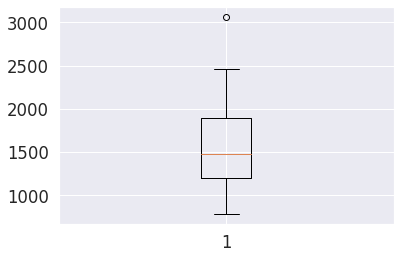

In [455]:
### 분포를 보는 또 다른 시각화 방법이 있습니다. 여러가지로 찍어 보겠습니다.
### 첫번째 :boxplot 입니다.

plt.boxplot(df['p_onion1'])
plt.show()

In [456]:
### 해석) 양파(일반)의 경우, 1,200원에서 1,900원 사이의 가격이 대부분이며 가장 비싼 3,000원의 가격도 존재

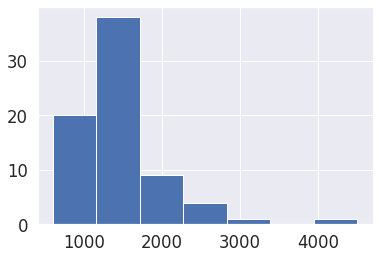

In [457]:
df['p_onion2'].hist(bins=7)

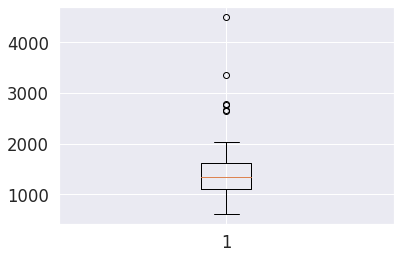

In [458]:
plt.boxplot(df['p_onion2'])
plt.show()

In [459]:
##기타 양파의 경우, 1,000원에서 1,500원 정도의 가격이 일반적이며 가장 비싼 가격은 4,000원이 넘기도 한다.

#### 2-3 설명변수(독립변수, features, attributes, x) 살펴보기
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


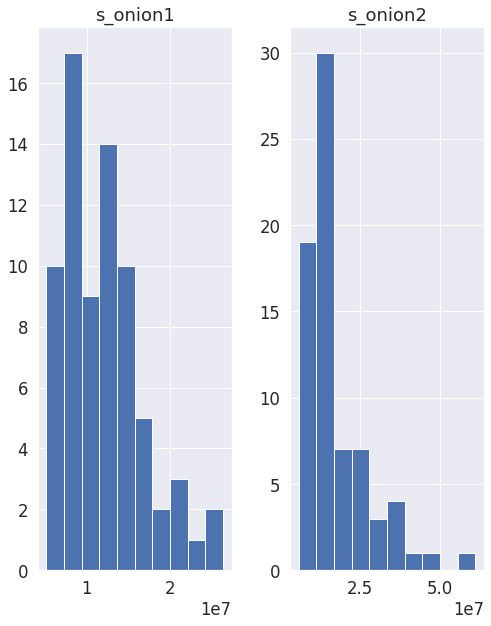

In [460]:
### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['s_onion1', 's_onion2']

### figsize()는 plot()의 기본 크기를 지정합니다. 
fig = plt.figure(figsize = (8, 10))
ax = fig.gca()  # Axes 생성

### gca(), gcf(), axis()
### gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다.
### ax=plt.gica(): 축의 위치를 호출하여 ax로 설정(축 위치 변경을 위해 필요한 과정)

df[numerical_columns].hist(ax=ax)
plt.show()

#### 2-4. 설명변수(x) 와 종속변수(y) 간의 관계 탐색
- 변수간의 상관관계 파악해 봅니다. 

In [461]:
### Person 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation), -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118
#변수간의 상관관계 보기 .corr()함수

cols = ['p_onion1', 's_onion1', 'p_onion2', 's_onion2']

corr = df[cols].corr(method = 'pearson')
corr

,p_onion1,s_onion1,p_onion2,s_onion2
p_onion1,1.000000,-0.133314,0.318576,-0.303791
s_onion1,-0.133314,1.000000,-0.080204,0.551605
p_onion2,0.318576,-0.080204,1.000000,0.282286
s_onion2,-0.303791,0.551605,0.282286,1.000000


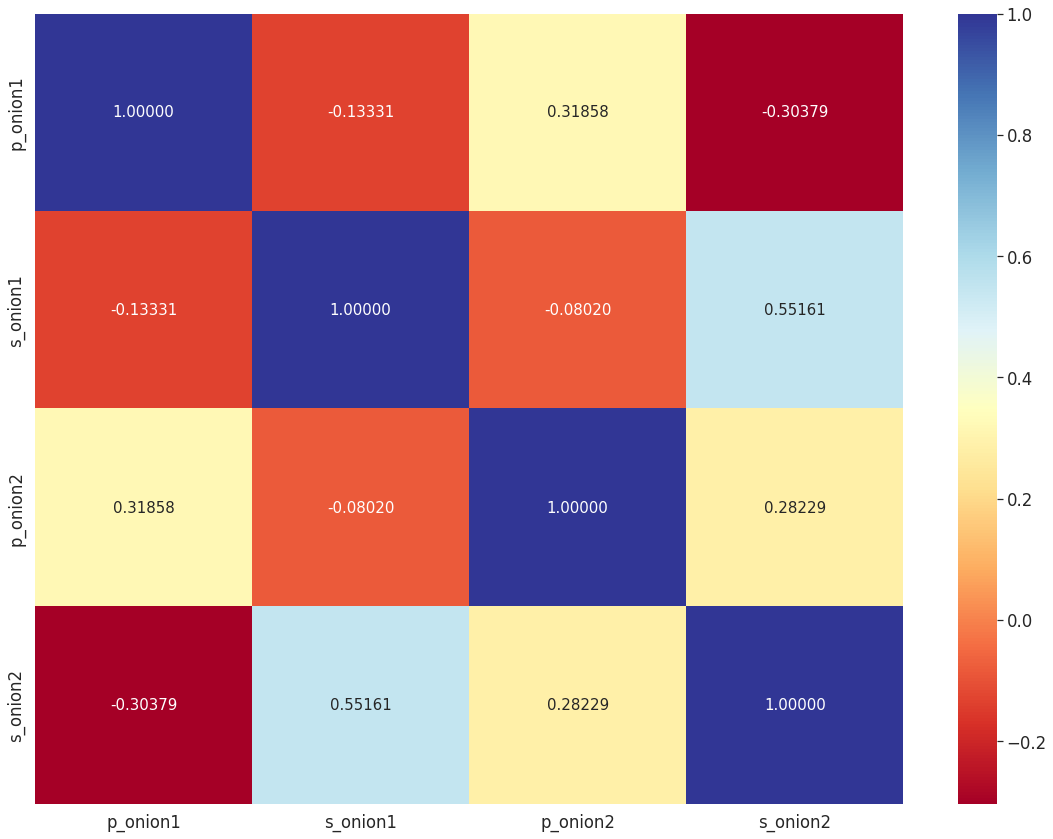

In [462]:
### 상관관계를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.
### heatmap (seaborn): 여기서는 seaborn 시각화 라이브러리를 사용해서 표현합니다. 
### 시각화의 대표적인 라이브러리가 matplot(https://matplotlib.org/)과 seaborn(https://seaborn.pydata.org/)이 있습니다.

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정 
heatmap = sns.heatmap(corr.values, annot = True, fmt='.5f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [463]:
### 해설) 
### 우리의 관심사인 target variable **“CMEDV - 주택 가격”**과 다른 변수간의 상관관계를 살펴보면,
### “CMEDV - 주택 가격”
### “RM - 자택당 평균 방 갯수”(0.7) (양의 상관관계)
### “LSTAT - 빈곤층의 비율”(-0.74) (음의 상관관게)
## 과 강한 상관관계를 보이고 있다는 것을 알 수 있습니다.

##### 2.4.1 CMEDV - 주택 가격~ 방 갯수("RM")의 관계

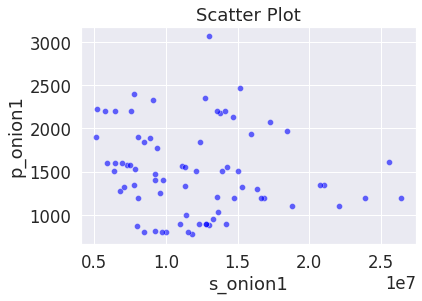

In [464]:
### scatter plot 산점도, https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x='s_onion1', y='p_onion1', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [465]:
### 해설) 
### 주택 가격이 방 갯수와 양의 상관관계(positive correlation)를 갖고 있습니다. 
### 즉, 방 갯수가 많은 주택들이 상대적으로 더 높은 가격을 갖고 있습니다.

##### 2.4.2 CMEDV - 빈곤층의 비율(“LSTAT”)의 관계

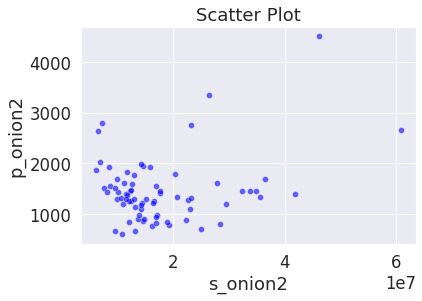

In [466]:
# scatter plot
sns.scatterplot(data=df, x='s_onion2', y='p_onion2', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [467]:
### 해설)
### 주택 가격이 빈곤층의 비율과 음의 상관관계(negative correlation)를 갖고 있습니다. 
### 즉, 빈곤층의 비율이 높은 지역의 주택 가격이 상대적으로 낮은 경향이 있습니다.

##### 2.4.3 도시별 차이 탐색 
- 데이터를 살펴보면 여러 지역이 같은 도시에 속한 경우가 있습니다.
- 변수 중에서도 도시 단위로 측정되는 변수가 많고요. 따라서 우리는 자연스럽게 도시 간의 차이를 궁금하게 됩니다.
- 다시한번 변수의 설명을 열거해 봅니다. 

1. TOWN: 소속 도시 이름
2. LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
3. CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing)(단위: USD 1000)
4. CRIM: 지역 범죄율 (per capita crime)
5. ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
6. INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
7. CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
8. NOX: 소속 도시의 산화질소 농도
9. RM: 해당 지역의 자택당 평균 방 갯수
10 .AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
11. DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
12. RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
13. TAX: 소속 도시의 10000달러당 재산세
14. PTRATIO: 소속 도시의 학생-교사 비율
15. B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비
16. LSTAT: 해당 지역의 빈곤층 비율

In [468]:
### 각 도시 데이터 갯수 살펴보기 
#df['TOWN'].value_counts()

In [469]:
### 해설)92개의 도시가 있습니다.

In [470]:
### 각 도시 데이터 갯수 살펴보기 (bar plot)을 활용해서 시각화를 합니다.
### 위의 각 도시 데이터 갯수를 x 축으로, 합니다. 즉, 데이터 갯수가 30개인 도시는 1개 입니다. x축은 30이고, y축은 1입니다.
#df['TOWN'].value_counts().hist(bins=50)

In [471]:
### 도시별 주택 가격 특징 (boxplot 이용)
#fig = plt.figure(figsize = (12, 20))
#sns.boxplot(x='CMEDV', y='TOWN', data=df)

In [472]:
### 해설) Boston 지역(Boston으로 시작하는 도시)의 주택 가격이 전반적으로 다른 지역보다 낮다는 것을 알 수 있습니다.

In [473]:
### 도시별 범죄율을 확인해 보겠습니다.
### 도시별 범죄율 특징
#fig = plt.figure(figsize = (12, 20))
#sns.boxplot(x='CRIM', y='TOWN', data=df)

In [474]:
### 해설) Boston 지역의 범죄율이 유독 높다는 것을 확인할 수 있고, 따라서 범죄율이 높은 지역의 주택 가격이 상대적으로 낮다는 것을 추측해볼 수 있겠습니다.

### 3. 주택가격 예측 모델링: 회귀분석
- 이제 변수들을 활용하여 매사추세츠주 각 지역의 주택 가격을 예측하는 회귀 모델을 만들어 보겠습니다.

#### 3-1 데이터 전처리
- 먼저 Feature 들의 scale 차이를 없애기 위해 수치형 Feature에 대해서 표준화를 진행해야 합니다.

In [475]:
df.head()

,date,p_onion1,s_onion1,p_onion2,s_onion2
0,20150101.0,1505.157143,13916582.0,600.0,10696722.0
1,20150201.0,900.000000,11005449.0,660.0,9499536.0
2,20150301.0,1031.000000,13611617.0,842.0,12055334.0
3,20150401.0,1109.000000,22077825.0,855.0,14524703.0
4,20150501.0,1200.000000,26358838.0,1221.0,14394715.0


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      73 non-null     float64
 1   p_onion1  73 non-null     float64
 2   s_onion1  73 non-null     float64
 3   p_onion2  73 non-null     float64
 4   s_onion2  73 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [477]:
### 문자형 변수인 "TOWN"와 범주형 변수인 “CHAS” (Dummy variable)를 제외하고 모든 수치형 변수에 대해서 표준화를 진행합니다.
### ### 참고) CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
### 사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리 입니다. 여러가지 머신러닝 모듈로 구성되어있습니다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['p_onion1', 's_onion1', 'p_onion2', 's_onion2']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
df.head()

In [479]:
df[scale_columns].head()

,p_onion1,s_onion1,p_onion2,s_onion2
0,0.000000,0.382018,-1.342480,-0.696513
1,-1.199877,-0.228088,-1.247918,-0.816844
2,-0.940136,0.318104,-0.961082,-0.559957
3,-0.785481,2.092425,-0.940594,-0.311757
4,-0.605051,2.989625,-0.363769,-0.324822


- training/test set 나누기
    - 나중에 도출될 예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나누겠습니다. 
    - Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증할 겁니다.

In [480]:
### features for linear regression model

df[numerical_columns].head()

,s_onion1,s_onion2
0,0.382018,-0.696513
1,-0.228088,-0.816844
2,0.318104,-0.559957
3,2.092425,-0.311757
4,2.989625,-0.324822


In [481]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['p_onion1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [482]:
X_train.shape, y_train.shape

((58, 2), (58,))

In [483]:
X_test.shape, y_test.shape

((15, 2), (15,))

In [484]:
y_train
### CMEDV 값을 의미합니다.

39   -0.327466
15    1.121926
43   -1.398152
35    0.188050
67    3.090799
59   -0.587206
71    1.688993
58   -1.100739
56   -1.199877
36    0.144429
52   -0.307638
31   -0.353241
68    1.236926
38    0.523135
21   -0.307638
65    0.215808
3    -0.785481
57   -1.199877
48   -1.001601
61    0.659945
45   -1.441773
24    0.782876
8     0.659945
17   -0.605051
0     0.000000
66    0.017533
46   -1.398152
7    -0.053846
70    1.377701
49   -1.398152
13    1.377701
22   -0.208501
32    0.061154
30   -0.446431
41   -0.793413
51   -0.406776
23    1.641407
4    -0.605051
63    0.850289
14    1.377701
29   -0.605051
28   -0.357207
42   -1.366428
11    1.427270
62    1.338046
18   -0.605051
72    0.000000
20   -0.208501
50   -1.233584
25    0.000000
6     0.130550
1    -1.199877
16   -0.605051
64    0.915720
5    -0.317552
9     0.759083
12    1.377701
37    0.188050
Name: p_onion1, dtype: float64

In [485]:
X_train

,s_onion1,s_onion2
39,-0.157557,1.734824
15,1.086397,-0.340228
43,-0.435294,0.538255
35,-1.081581,-0.713450
67,0.191245,-0.645386
59,0.310159,-0.113040
71,0.129945,-0.624796
58,0.242398,-0.285624
56,0.049431,-0.080561
36,-0.962867,-0.766544


- 다중공산성

    - 회귀 분석에서 하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면 (즉, 다중공선성이 존재하면), 회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링 하기 전에 먼저 다중공선성의 존재 여부를 확인해야합니다.
    - 보통 다중공선성을 판단할 때 VIF값을 확인합니다. 일반적으로, VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, 다중공선성이 존재하는 것으로 판단합니다. 즉, VIF > 10인 feature들은 설명변수에서 제거하는 것이 좋을 수도 있습니다.

In [486]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 
### 소수점 첫째자리까지 표시합니다. 즉, 소수점 둘째짜리에서 반올림 합니다.

,features,VIF Factor
0,s_onion1,1.4
1,s_onion2,1.4


In [487]:
### 해설) VIF값을 확인해보면, 모든 변수의 VIF값이 다 10 이하입니다. 따라서 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링을 진행하면 됩니다.

### 3-2 회귀모델링
- 먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
- 그 다음 도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측합니다. 
- 이 결과는 실제 “CMEDV” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.


In [488]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

### 3-3 모델해석하기
- 각 feature, 설명변수, x, 컬럼에 대한 회귀계수를 확인해 보겠습니다. 

In [489]:
### print coef 
### 계수를 출력합니다.
print(lr.coef_)

[ 0.03508983 -0.34658407]


In [490]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

### from sklearn.model_selection import train_test_split

### split dataset into training & test
# X = df[numerical_columns]
# y = df['CMEDV']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

,feature,coefficients
0,s_onion1,0.035090
1,s_onion2,-0.346584


In [491]:
### 크기 순서대로 나열합니다. 
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다. 
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
1,s_onion2,-0.346584
0,s_onion1,0.035090


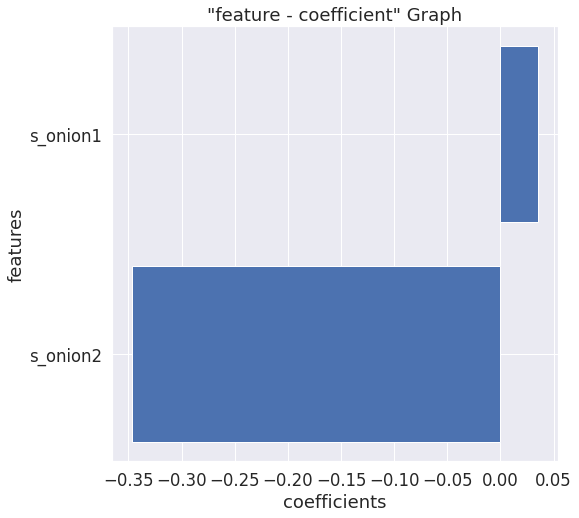

In [492]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

- 유의성 검정을 합니다. 통계에서 변수가 유의하다는 의미입니다.


In [493]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.
### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               p_onion1   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     3.244
Date:                Tue, 02 Nov 2021   Prob (F-statistic):             0.0466
Time:                        15:52:38   Log-Likelihood:                -77.915
No. Observations:                  58   AIC:                             161.8
Df Residuals:                      55   BIC:                             168.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.125      0.088      0.930      -0.240       0.262
s_onion1       0.0351      0.145      0.241      0.810      -0.256       0.326
s_onion2      -0.3466      0.151     -2.289      0.026      -0.650      -0.043
==============================================================================
Omnibus:                        3.116   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.766
Skew:                           0.533   Prob(JB):                        0.251
Kurtosis:                       2.921   Cond. No.                         1.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
### 해설) coeff를 봐야 합니다.
### P>|t|를 봐야 합니다. p-value를 의미한다. 0.05 보다 작아야 유의하다!! 
### R-squre 를 봐야 합니다. 설명력을 의미합니다.


## 참고) 기억하기!!! ###
- 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.
- 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킨다. 
- 결정계수의 통상적인 기호는 R²이다. 
- 일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 들어갈수록 증가하기 때문에 해석에 주의해야 한다. 
- 결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워진다. 
- 즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있다.

##### | 해석하기 | 

1. "INDUS"(상업적 비즈니스에 활용되지 않는 농지 면적: p-value: 0.747)과 “AGE”(1940년 이전에 건설된 비율: p-value:0.771)은 유의하지 않습니다. (p value > 0.05)

2. 주택 가격에 Positive한 영향을 미칩니다.
- "ZN"(25,000 제곱 피트(sq.ft) 이상의 주택지 비율),
- "CHAS"(Charles 강과 접하고 있는지 여부),
- "RM"(자택당 평균 방 갯수),
- "RAD"(소속 도시가 Radial 고속도로와의 접근성 지수),
- "B"(흑인 지수)는
: 다른 변수의 값이 고정했을 때, 해당 변수의 값이 클수록 주택의 가격이 높을 것입니다.

3. 주택 가격에 Negative한 영향을 미칩니다.
- "CRIM"(지역 범죄율),
- "NOX"(산화질소 농도),
- "DIS"(보스턴 고용 센터와의 거리),
- "TAX"(재산세),
- "PTRATIO"(학생-교사 비율),
- "LSTAT"(빈곤층 비율)은
:다른 변수의 값이 고정했을 때, 해당 변수의 값이 작을수록 주택의 가격이 높을 것입니다.

### 3-4 모델 에측 결과 및 성능 평가
- 예측 결과를 가시화 합니다  

학습한 모델을 Test set에 적용하여 y값(“CMEDV”)을 예측합니다.

예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화해보겠습니다.

In [495]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

### reset_index() : 아무래도 데이터프레임의 다양한 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많다. 이럴때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수다.
### drop=True옵션을 주면 기존 인덱스를 버리고 재배열해준다.
### https://yganalyst.github.io/data_handling/Pd_2/

,actual,prediction
0,-1.398152,-0.197129
1,-1.249446,0.139484
2,-1.199877,0.157179
3,-1.199877,-0.027412
4,-0.940136,0.216291


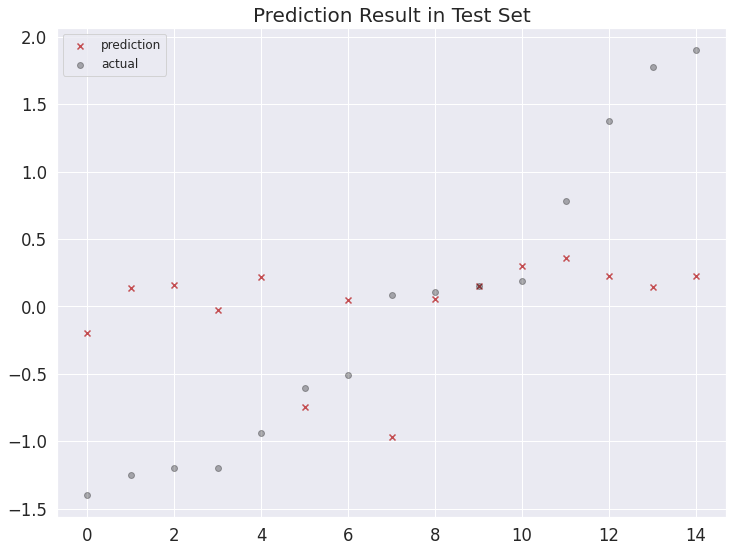

In [496]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

- 모델 성능 평가 (R squre 와 RMSE)

In [497]:
### R square
### 결정계수 : 0 부터 1까지의 값을 갖고, 1에 가까울수록 설명력이 높음을 의미한다. 
### 선형 회귀 모델이 데이터에 대해 얼마나 잘 설명해주는지에 대한 값
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.10551890402990416
0.050801703155534894


In [501]:
### RMSE
### 제곱근을 취한 평균 제곱근 오차(Root mean squared error, RMSE) = 표준편차
### 특정 수치에 대한 예측의 정확도를 표현할 때, 
### Accuracy로 판단하기에는 정확도를 올바르게 표기할 수 없어, RMSE 수치로 정확도 판단을 하곤 한다. 
### 일반적으로 해당 수치가 낮을수록 정확도가 높다고 판단한다.
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.9272098849898941
1.0435614499262107


In [502]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [503]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.05이고, RMSE가 1.04입니다.